In [36]:
#Step by Step PCA with Iris dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set()
import matplotlib.pyplot as plt
import os

In [39]:
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target
iris_data.info()
#iris_data = pd.read_csv("Iris.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [40]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [41]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


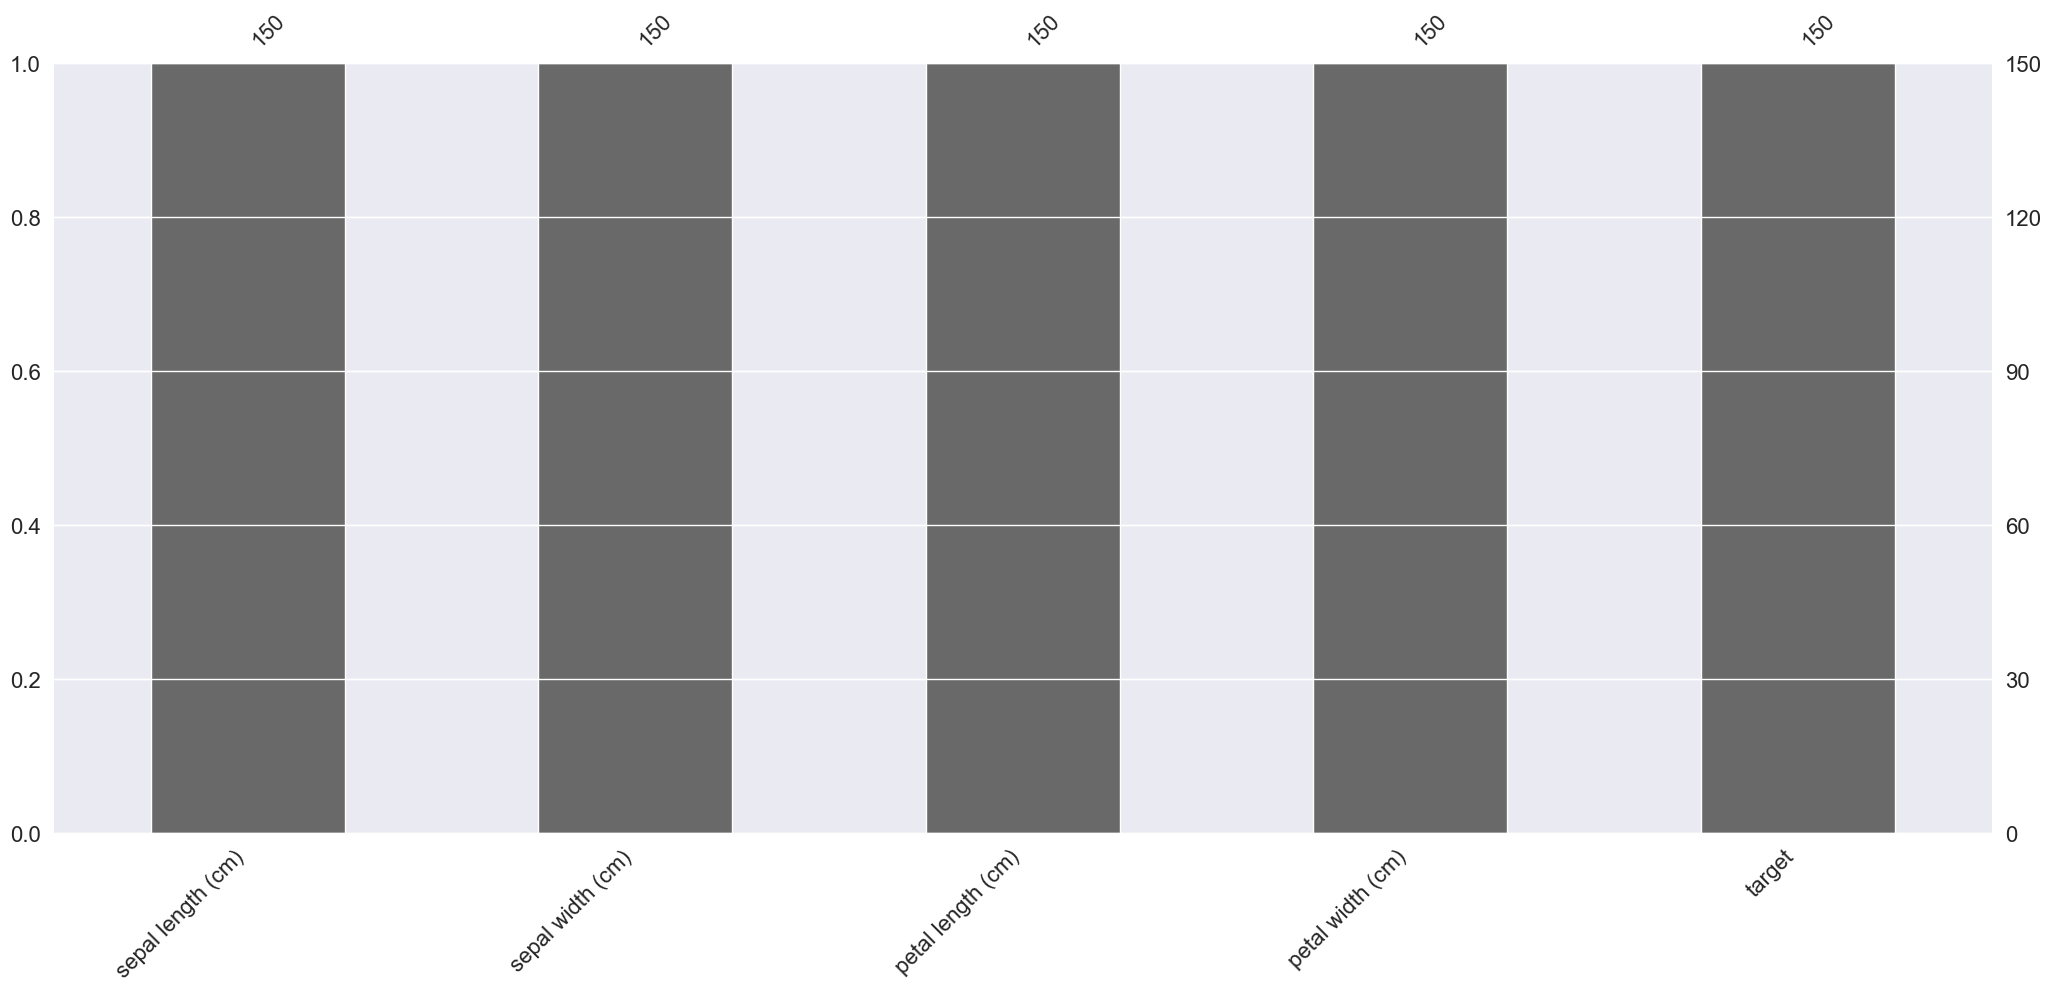

In [42]:
## null count analysis before modelling to keep check
!pip install missingno
import missingno as msno
p=msno.bar(iris_data)

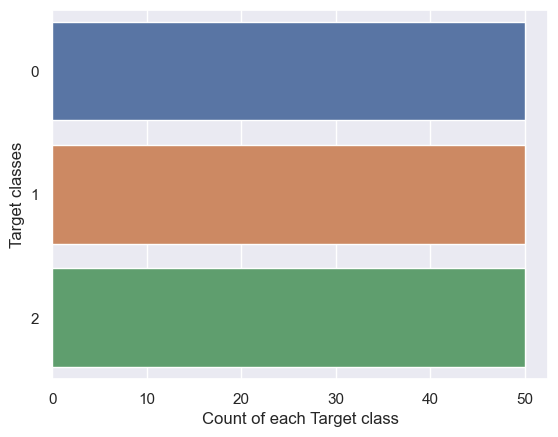

In [44]:
## Label encoding since the algorithms we are going to use do not take non numerical or boolean data as inputs
#iris_data.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)
#sns.countplot(y=iris_data.Species ,data=iris_data)
sns.countplot(y=iris_data.target,data=iris_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [ ]:
#Early Insights :
#150 rows
4# Independent variables to act as factors
#All have same units of measurement (cm)
#No missing data
#Three unique target classes namely : 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'
#No class imbalance, all target classes have equal number of rows (50 each).


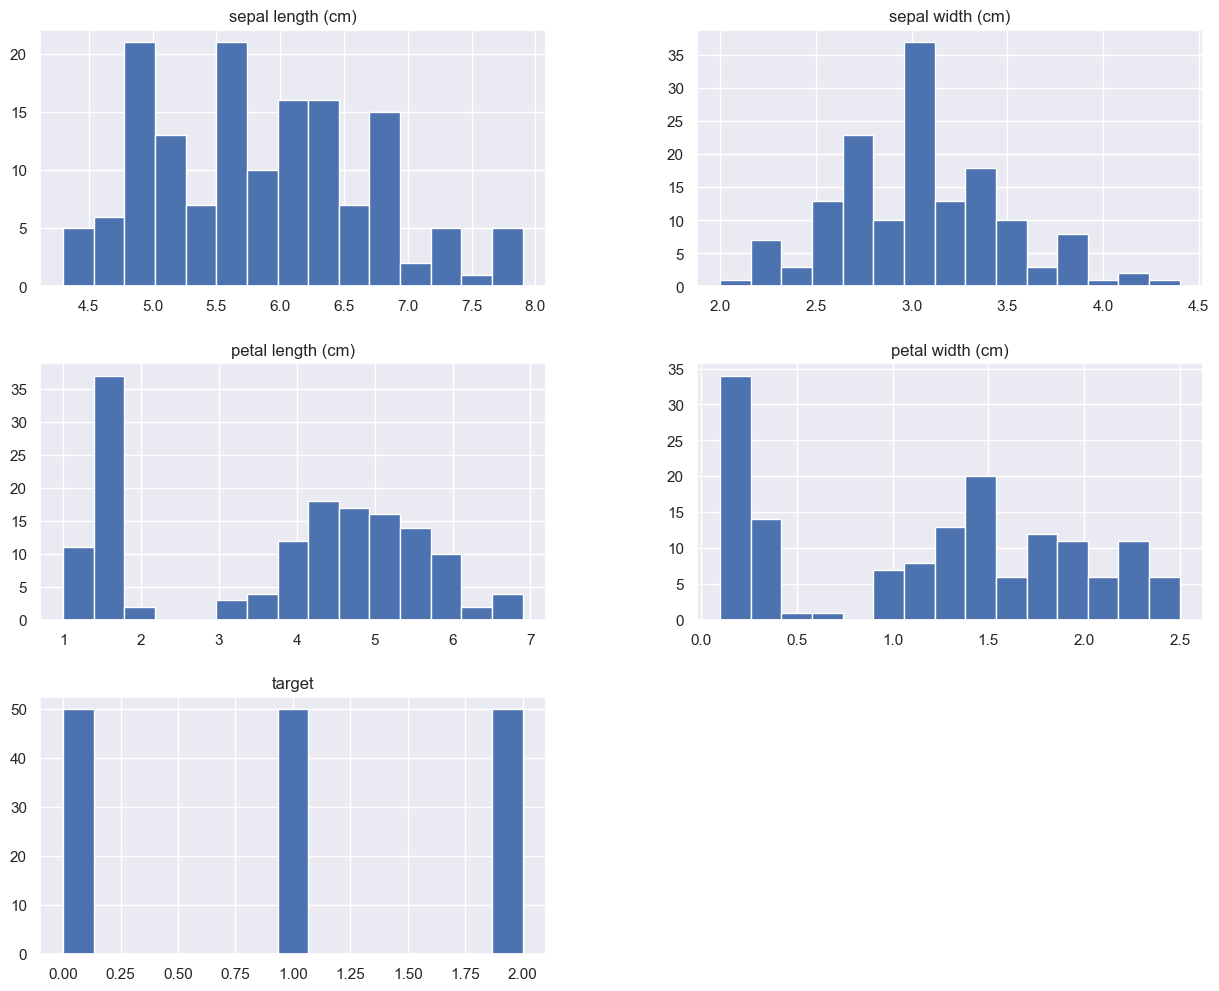

In [45]:
iris_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

# Modelling without PCA



In [61]:
x = iris_data.drop(['target'],axis=1)
y = iris_data.target


In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

In [64]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.9714285714285714 %
Test score before PCA 0.9777777777777777 %


In [66]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [67]:
pca.get_covariance()

array([[ 0.05290845, -0.00491134,  0.05999602,  0.05975355],
       [-0.00491134,  0.03298254, -0.02328082, -0.02111795],
       [ 0.05999602, -0.02328082,  0.08952249,  0.09149784],
       [ 0.05975355, -0.02111795,  0.09149784,  0.10086914]])

In [68]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.84136038, 0.11751808, 0.03473561, 0.00638592])

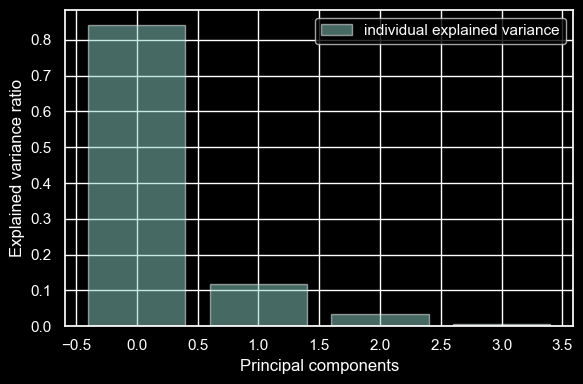

In [69]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

# With PCA



In [71]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [72]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [73]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %


C:\Users\kunal\AppData\Local\Temp\ipykernel_14012\3520711448.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


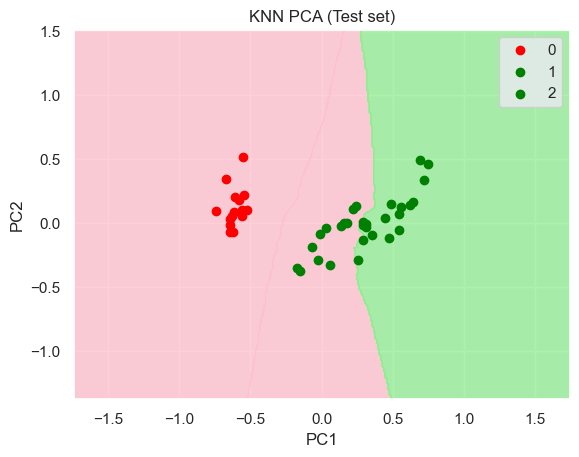

In [74]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
